In [1]:
#Importing Libraries 

import numpy as np
import os
import random
import matplotlib.pyplot as plt
import pathlib
import cv2
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
# Printing the folders in our dataset

print(os.listdir (r"C:\Users\DELL\Documents\imageprocessing\Cheetahs-vs-Jaguars"))

['test', 'train', 'val']


In [3]:
# Printing the sub-folders of the dataset

train_directory = r"C:\Users\DELL\Documents\imageprocessing\Cheetahs-vs-Jaguars\train"
train_folder = os.listdir(train_directory)

validation_directory = r"C:\Users\DELL\Documents\imageprocessing\Cheetahs-vs-Jaguars\val"
validation_folder = os.listdir(validation_directory)

print(train_folder, validation_folder)

['cheetah_train', 'jaguar_train'] ['cheetah_validation', 'jaguar_validation']


In [4]:
#Preprocessing Train Data

image_size = 300
train_data = []

for folder in train_folder:
    folder_path = train_directory
    folder_path = os.path.join(folder_path,folder)
    label = train_folder.index(folder) #assigns label of Cheetah as 0 and label of Jaguar as 1

    print(folder_path)
    print("Label:", label)
    
    for image in os.listdir(folder_path):
        image_path = os.path.join(folder_path,image)
        image_arr = cv2.imread(image_path)
        image_arr = cv2.resize(image_arr,(image_size,image_size))
        train_data.append([image_arr,label])

C:\Users\DELL\Documents\imageprocessing\Cheetahs-vs-Jaguars\train\cheetah_train
Label: 0
C:\Users\DELL\Documents\imageprocessing\Cheetahs-vs-Jaguars\train\jaguar_train
Label: 1


In [5]:
#Preprocessing Validation Data

image_size = 300
validation_data = []

for folder in validation_folder:
    folder_path = validation_directory
    folder_path = os.path.join(validation_directory,folder)
    label = validation_folder.index(folder) #assigns label of Cheetah as 0 and label of Jaguar as 1
    print(folder_path)
    print("Label:", label)
    
    for image in os.listdir(folder_path):
        image_path = os.path.join(folder_path,image)
        image_arr = cv2.imread(image_path)
        image_arr = cv2.resize(image_arr,(image_size,image_size))
        validation_data.append([image_arr,label])

C:\Users\DELL\Documents\imageprocessing\Cheetahs-vs-Jaguars\val\cheetah_validation
Label: 0
C:\Users\DELL\Documents\imageprocessing\Cheetahs-vs-Jaguars\val\jaguar_validation
Label: 1


In [6]:
len(train_data),len(validation_data)

(1800, 200)

In [7]:
#Train Data
#Dividing features and labels to X and y respectively.

X_train = []
y_train = []

for features, labels in train_data:
    X_train.append(features)
    y_train.append(labels)

In [8]:
#Test Data
#Dividing features and labels to X and y respectively.

X_test = []
y_test = []

for features, labels in validation_data:
    X_test.append(features)
    y_test.append(labels)

In [9]:
#Converting list to array

X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [10]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1800, 300, 300, 3), (1800,), (200, 300, 300, 3), (200,))

In [11]:
#Convert array datatype to float for division
#Dividing array values by 255 normalizes the pixel values between 0 and 1 

X_train = X_train.astype('float32')
X_train = X_train / 255.0

X_test = X_test.astype('float32')
X_test = X_test / 255.0

In [12]:
#Building the model using the concepts of Convolutional Neural Networks (CNNs)

model = keras.Sequential()

# Convolutional layer and maxpool layer 1
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(300,300,3)))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 2
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 3
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# Convolutional layer and maxpool layer 4
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))

# This layer flattens the resulting image array to 1D array
model.add(keras.layers.Flatten())

# Hidden layer with 512 neurons and Rectified Linear Unit activation function 
model.add(keras.layers.Dense(512,activation='relu'))

# Output layer with single neuron which gives 0 for Cheetah or 1 for Jaguar 
#Here we use sigmoid activation function which makes our model output to lie between 0 and 1
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [13]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
#Fitting the model to the training datset and validating the same using the validation dataset

history = model.fit(X_train, y_train, steps_per_epoch = 30, epochs = 10,validation_data = (X_test, y_test), verbose = 2)

Epoch 1/10
30/30 - 284s - loss: 0.8314 - accuracy: 0.5678 - val_loss: 0.6553 - val_accuracy: 0.6600
Epoch 2/10
30/30 - 268s - loss: 0.4814 - accuracy: 0.7694 - val_loss: 0.4293 - val_accuracy: 0.7900
Epoch 3/10
30/30 - 272s - loss: 0.3855 - accuracy: 0.8378 - val_loss: 0.3795 - val_accuracy: 0.8550
Epoch 4/10
30/30 - 274s - loss: 0.3033 - accuracy: 0.8789 - val_loss: 0.3456 - val_accuracy: 0.8450
Epoch 5/10
30/30 - 267s - loss: 0.2731 - accuracy: 0.8850 - val_loss: 0.2911 - val_accuracy: 0.8650
Epoch 6/10
30/30 - 265s - loss: 0.2783 - accuracy: 0.8900 - val_loss: 0.3863 - val_accuracy: 0.8450
Epoch 7/10
30/30 - 270s - loss: 0.2747 - accuracy: 0.8867 - val_loss: 0.3570 - val_accuracy: 0.8350
Epoch 8/10
30/30 - 268s - loss: 0.1858 - accuracy: 0.9294 - val_loss: 0.3059 - val_accuracy: 0.8800
Epoch 9/10
30/30 - 253s - loss: 0.1644 - accuracy: 0.9339 - val_loss: 0.2578 - val_accuracy: 0.8950
Epoch 10/10
30/30 - 260s - loss: 0.1186 - accuracy: 0.9583 - val_loss: 0.4287 - val_accuracy: 0.8550

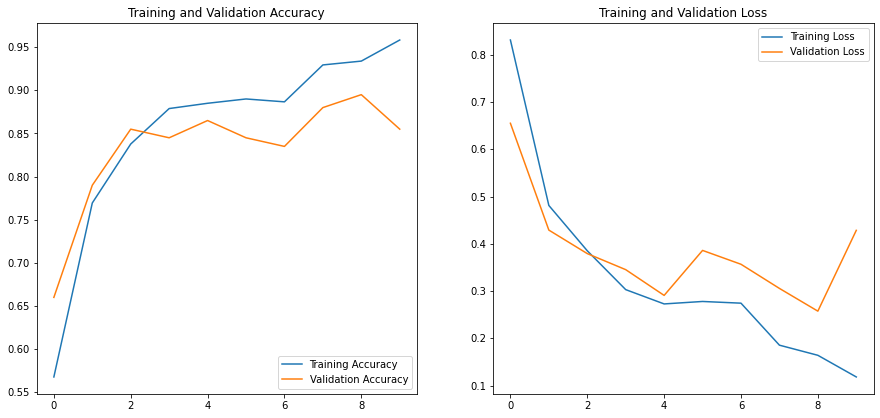

In [15]:
#Visualisation of training results

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [16]:
#Saving the model as hdf5 file so that it can be used for classification later

tf.keras.models.save_model(model,'model_2.hdf5')

In [17]:
#Creating a function that can be called to classify an image

from tensorflow.keras.preprocessing import image
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(300,300))
    
    plt.imshow(img1)
 
    Y = image.img_to_array(img1)
    
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X) #val returns the predicted label 
    print(val)
    if val == 1:
        plt.xlabel("Jaguar",fontsize=30)
    else:
        plt.xlabel("Cheetah",fontsize=30)

[[1.]]


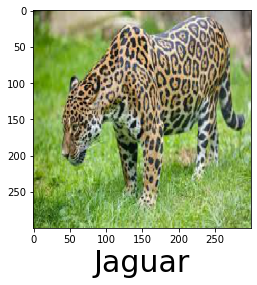

In [18]:
predictImage(r"C:\Users\DELL\Documents\imageprocessing\Cheetahs-vs-Jaguars\test\jaguars.jpg")

[[1.]]


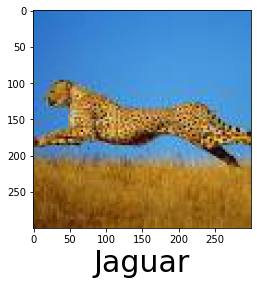

In [19]:
predictImage(r"C:\Users\DELL\Documents\imageprocessing\Cheetahs-vs-Jaguars\test\iim1.jpg")